In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import warnings
import textwrap
wrapper = textwrap.TextWrapper(width=10)
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [2]:
data_path = '/Users/teoshuqi/Documents/SSG Technical Assessment/qn1/kaggle_survey_2017_2021.csv'

## Read Data ##

In [3]:
raw_data = pd.read_csv(data_path)
raw_data.head(4)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/teoshuqi/Documents/SSG Technical Assessment/qn1/kaggle_survey_2017_2021.csv'

## Clean/Transform Data ##
* Aggregate responses from same questions (questions are mainly ticking all that applies)
* Pivot data from wide to long form (easier to manipulate)
* Clean string with weird symbols and lowercase

In [ ]:
data_rename = raw_data.copy(deep=True)
# Aggregate responses
qn_no_store = {}
idx = 1
for col in range(2, data_rename.shape[1]):
    qn_no = data_rename.columns[col]
    old_qn = data_rename.iloc[0, col]
    # Aggregate same question different choices with the same qn no and question 
    if qn_no.startswith('Q'):
        new_qn_no = qn_no.split('_')[0]  # remove parts in qn no
        new_qn = old_qn.split('-')[0].strip() # remove choices specifed in question
        data_rename.iloc[0, col] = new_qn
        if new_qn not in qn_no_store:
            qn_no_store[new_qn] = idx # store qn to qn no mapping
            idx += 1
data_rename.columns = data_rename.iloc[0]
data_rename = data_rename.drop(0)
data_rename.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired):,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply),What programming languages do you use on a regular basis? (Select all that apply),...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)"
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Pivot data
ds_survey = pd.melt(data_rename, id_vars=data_rename.columns[:2], 
        value_vars=data_rename.columns[2:], 
        var_name='qn', value_name='ans')
ds_survey = ds_survey.dropna()
ds_survey['qn_no'] = ds_survey['qn'].apply(lambda x: qn_no_store[x])
ds_survey.tail(10)

,Year,Duration (in seconds),qn,ans,qn_no
30872171,2020,302,"In the next 2 years, do you hope to become mor...",Other,45
30872393,2020,860,"In the next 2 years, do you hope to become mor...",Other,45
30872628,2020,169614,"In the next 2 years, do you hope to become mor...",Other,45
30872738,2020,325,"In the next 2 years, do you hope to become mor...",Other,45
30872779,2020,1272,"In the next 2 years, do you hope to become mor...",Other,45
30872866,2020,483,"In the next 2 years, do you hope to become mor...",Other,45
30872989,2020,525,"In the next 2 years, do you hope to become mor...",Other,45
30873037,2020,825,"In the next 2 years, do you hope to become mor...",Other,45
30873066,2020,842,"In the next 2 years, do you hope to become mor...",Other,45
30873236,2020,5936,"In the next 2 years, do you hope to become mor...",Other,45


In [321]:
# Clean string
def clean_answers(ans):
    new_ans = re.sub('[^A-Za-z0-9-<>+,().\s\/]+', ' ', ans)
    new_ans = new_ans.strip().lower()
    return new_ans
ds_survey_clean = ds_survey.copy(deep=True)
ds_survey_clean['ans'] = ds_survey_clean['ans'].apply(clean_answers)
ds_survey_clean = ds_survey_clean.dropna()

# Column Type
ds_survey_clean['Year'] = ds_survey_clean['Year'].astype(int)
ds_survey_clean['Duration (in seconds)'] = ds_survey_clean['Duration (in seconds)'].astype(int)
ds_survey_clean['qn'] = ds_survey_clean['qn'].astype(str)
ds_survey_clean['ans'] = ds_survey_clean['ans'].astype(str)
ds_survey_clean['qn_no'] = ds_survey_clean['qn_no'].astype(str)
ds_survey_clean.tail()

,Year,Duration (in seconds),qn,ans,qn_no
30660587,2020,681,"In the next 2 years, do you hope to become mor...",domino model monitor,45
30660589,2020,642,"In the next 2 years, do you hope to become mor...",domino model monitor,45
30660604,2020,4328,"In the next 2 years, do you hope to become mor...",domino model monitor,45
30660663,2020,917,"In the next 2 years, do you hope to become mor...",domino model monitor,45
30660688,2020,739,"In the next 2 years, do you hope to become mor...",domino model monitor,45


In [322]:
for qn, qnno in qn_no_store.items():
    print(qnno, qn)

1 What is your age (# years)?
2 What is your gender?
3 In which country do you currently reside?
4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
5 Select the title most similar to your current role (or most recent title if retired):
6 For how many years have you been writing code and/or programming?
7 What programming languages do you use on a regular basis? (Select all that apply)
8 What programming language would you recommend an aspiring data scientist to learn first?
9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)
10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)
11 What type of computing platform do you use most often for your data science projects?
12 Which types of specialized hardware do you use on a regular basis?  (Select all that apply)
13 Approximately how many times have you u

## Years ##

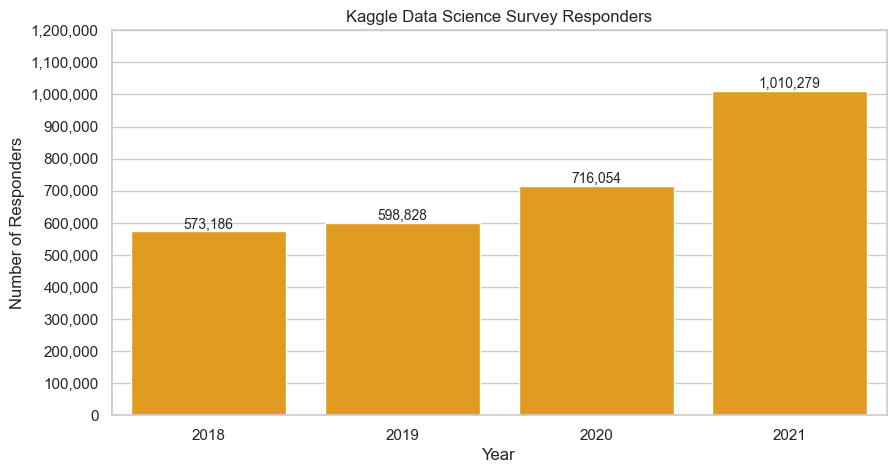

In [323]:
YEAR=[2018, 2019, 2020, 2021]
fig, ax = plt.subplots(figsize=(10,5))
g = sns.countplot(x=ds_survey_clean["Year"], color='orange', ax=ax)
ax.bar_label(ax.containers[0], fmt='{:,.0f}',  fontsize=10)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Responders')
ax.set_title('Kaggle Data Science Survey Responders')
ax.set_yticks(range(0,1200001,100000))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [400]:
def feature_percent_over_time(data, feature, qns=[], clean_fn=lambda x:x, with_qnno=False):
    """
    Calculate percentage of each class (str) in feature over the years.

    Parameters:
        data (pandas.DataFrame): DataFrame with data of all features.
        feature (str): Feature name of feature to analyse
        qns (list): list of questions corresponding to feature
        clean_fn (function, optional): function to clean the feature classes
        with_qnno (boolean, optional): if qn no is required in feature class

    Returns:
        survey_feature_percent (pandas.DataFrame): with 3 columns year the observed data was collected, 
        feature name, percent of each feature class
    """
    # extract ans related to feature
    survey_feature = data.loc[ds_survey_clean.qn_no.isin(qns), :]
    # clean feature classes
    survey_feature.loc[:, feature] = survey_feature.loc[:, 'ans'].apply(clean_fn)
    survey_feature= survey_feature.dropna()
    # add qn no to feature class if necessary 
    if with_qnno:
        survey_feature.loc[:, feature] = survey_feature["qn_no"] + ' '+ survey_feature.loc[:, feature]
    # calculate percentage
    survey_feature_percent = survey_feature.groupby(['Year'])[feature] \
                                            .value_counts(normalize=True) \
                                            .reset_index()
    survey_feature_percent.loc[:,'Percent'] = survey_feature_percent.loc[:,'proportion'].apply(lambda x: x*100)
    survey_feature_percent = survey_feature_percent.loc[:, ['Year',  feature, 'Percent']]
    return survey_feature_percent


def plot_top_classes_over_years(feature_data, plot_vars={}):
    """
    Plot barcharts (1 for each year) of top n feature classes over the year.

    Parameters:
        feature_data (pandas.DataFrame): DataFrame with percent of each feature class over the years.
        plot_vars (dict): Contains variables to customised plot. 
                          Compulsory features: feature, metric, top_n, title, y_label, figsize, feature

    Returns:
    """
    fig, ax = plt.subplots(len(YEAR), figsize=plot_vars['figsize'])
    # loop through years to plot barchat
    for i in range(len(YEAR)):
        # get top n class of the feature for each year
        subset = feature_data.loc[feature_data.Year==YEAR[i], :]
        top = subset.sort_values(by=plot_vars['metric'], ascending=False).head(plot_vars['top_n'])
        # plot barchart of top n classes according to metric
        if top.shape[0] > 0:
            g = sns.barplot(data=top, x=plot_vars['feature'], y=plot_vars['metric'], palette=reversed(sns.color_palette("Blues", 15)), ax=ax[i])
            for container in ax[i].containers:
                ax[i].bar_label(container, fmt='%.1f%%', fontsize=12)
        # configure barchart labels
        ax[i].set_xlabel('')
        ax[i].set_ylabel(plot_vars['ylabel'])
        wrapped_labels = [wrapper.fill(label.get_text()) for label in ax[i].get_xticklabels()]
        ax[i].set_xticklabels(wrapped_labels, va='top', ha="center", rotation=0)
    # label figure
    fig.suptitle(plot_vars['title'], fontsize=14)
    fig.tight_layout()
    return 

## Gender ##

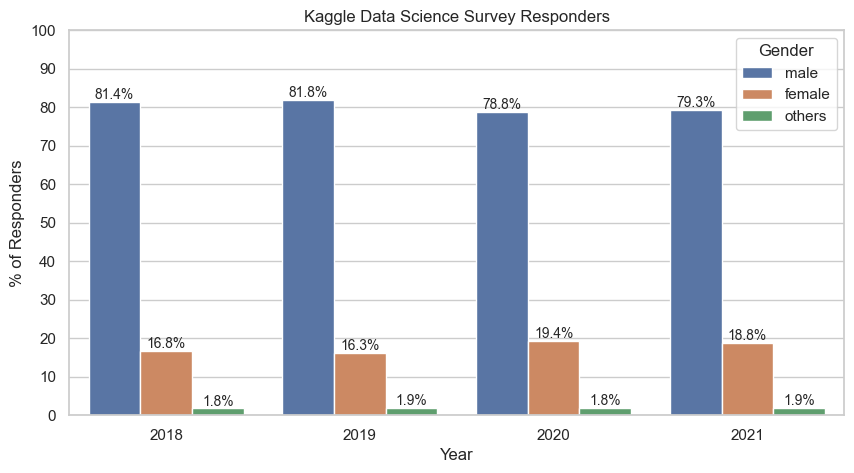

In [358]:
FEATURE = 'Gender'
QNS = ['2']

def clean_gender_answers(ans):
    gender_mapping = {
        'man':'male', 
        'woman':'female', 
        'prefer to self-describe':'others', 
        'prefer not to say':'others',
        'nonbinary':'others',
        'male':'male',
        'female':'female'
        }
    new_ans = gender_mapping[ans]
    return new_ans

survey_gender_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS, clean_gender_answers)

# plot barchart of percentage of each class for feature
fig, ax = plt.subplots(figsize=(10,5))
g = sns.barplot(data=survey_gender_percent, x='Year', y='Percent', hue=FEATURE, ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%',  fontsize=10)

# configure barchart labels
ax.set_xlabel('Year')
ax.set_ylabel(r'% of Responders')
ax.set_title('Kaggle Data Science Survey Responders')
ax.set_yticks(range(0,101,10))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

## Occupation ##

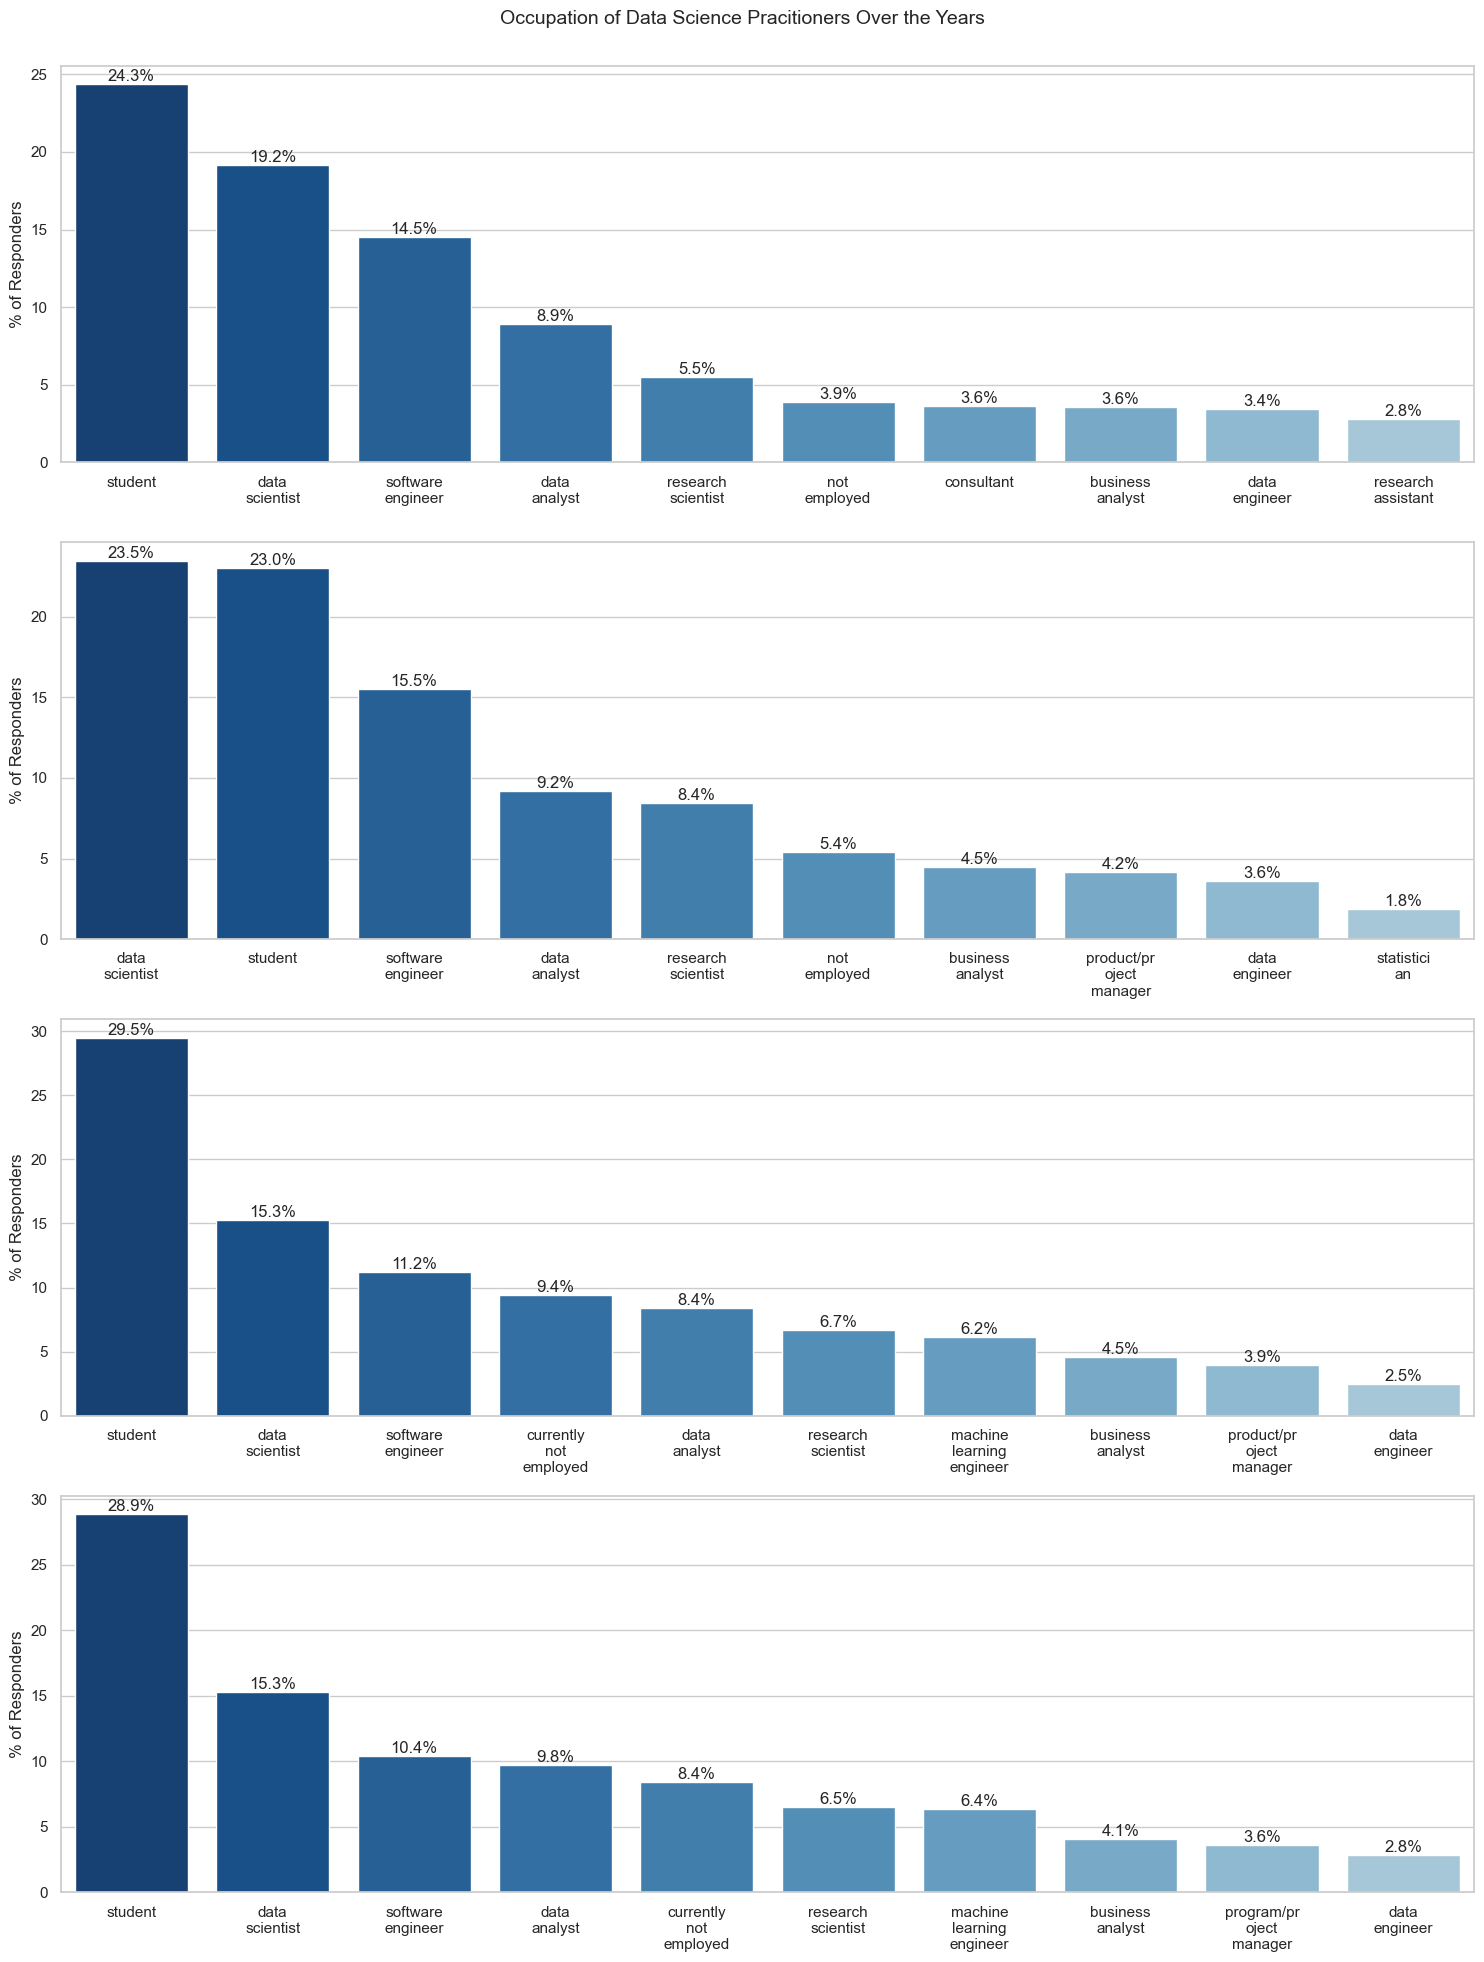

In [414]:
FEATURE = 'Occupation'
QNS = ['5']


survey_occupation_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_occupation_percent, plot_vars)

## Programming language ##

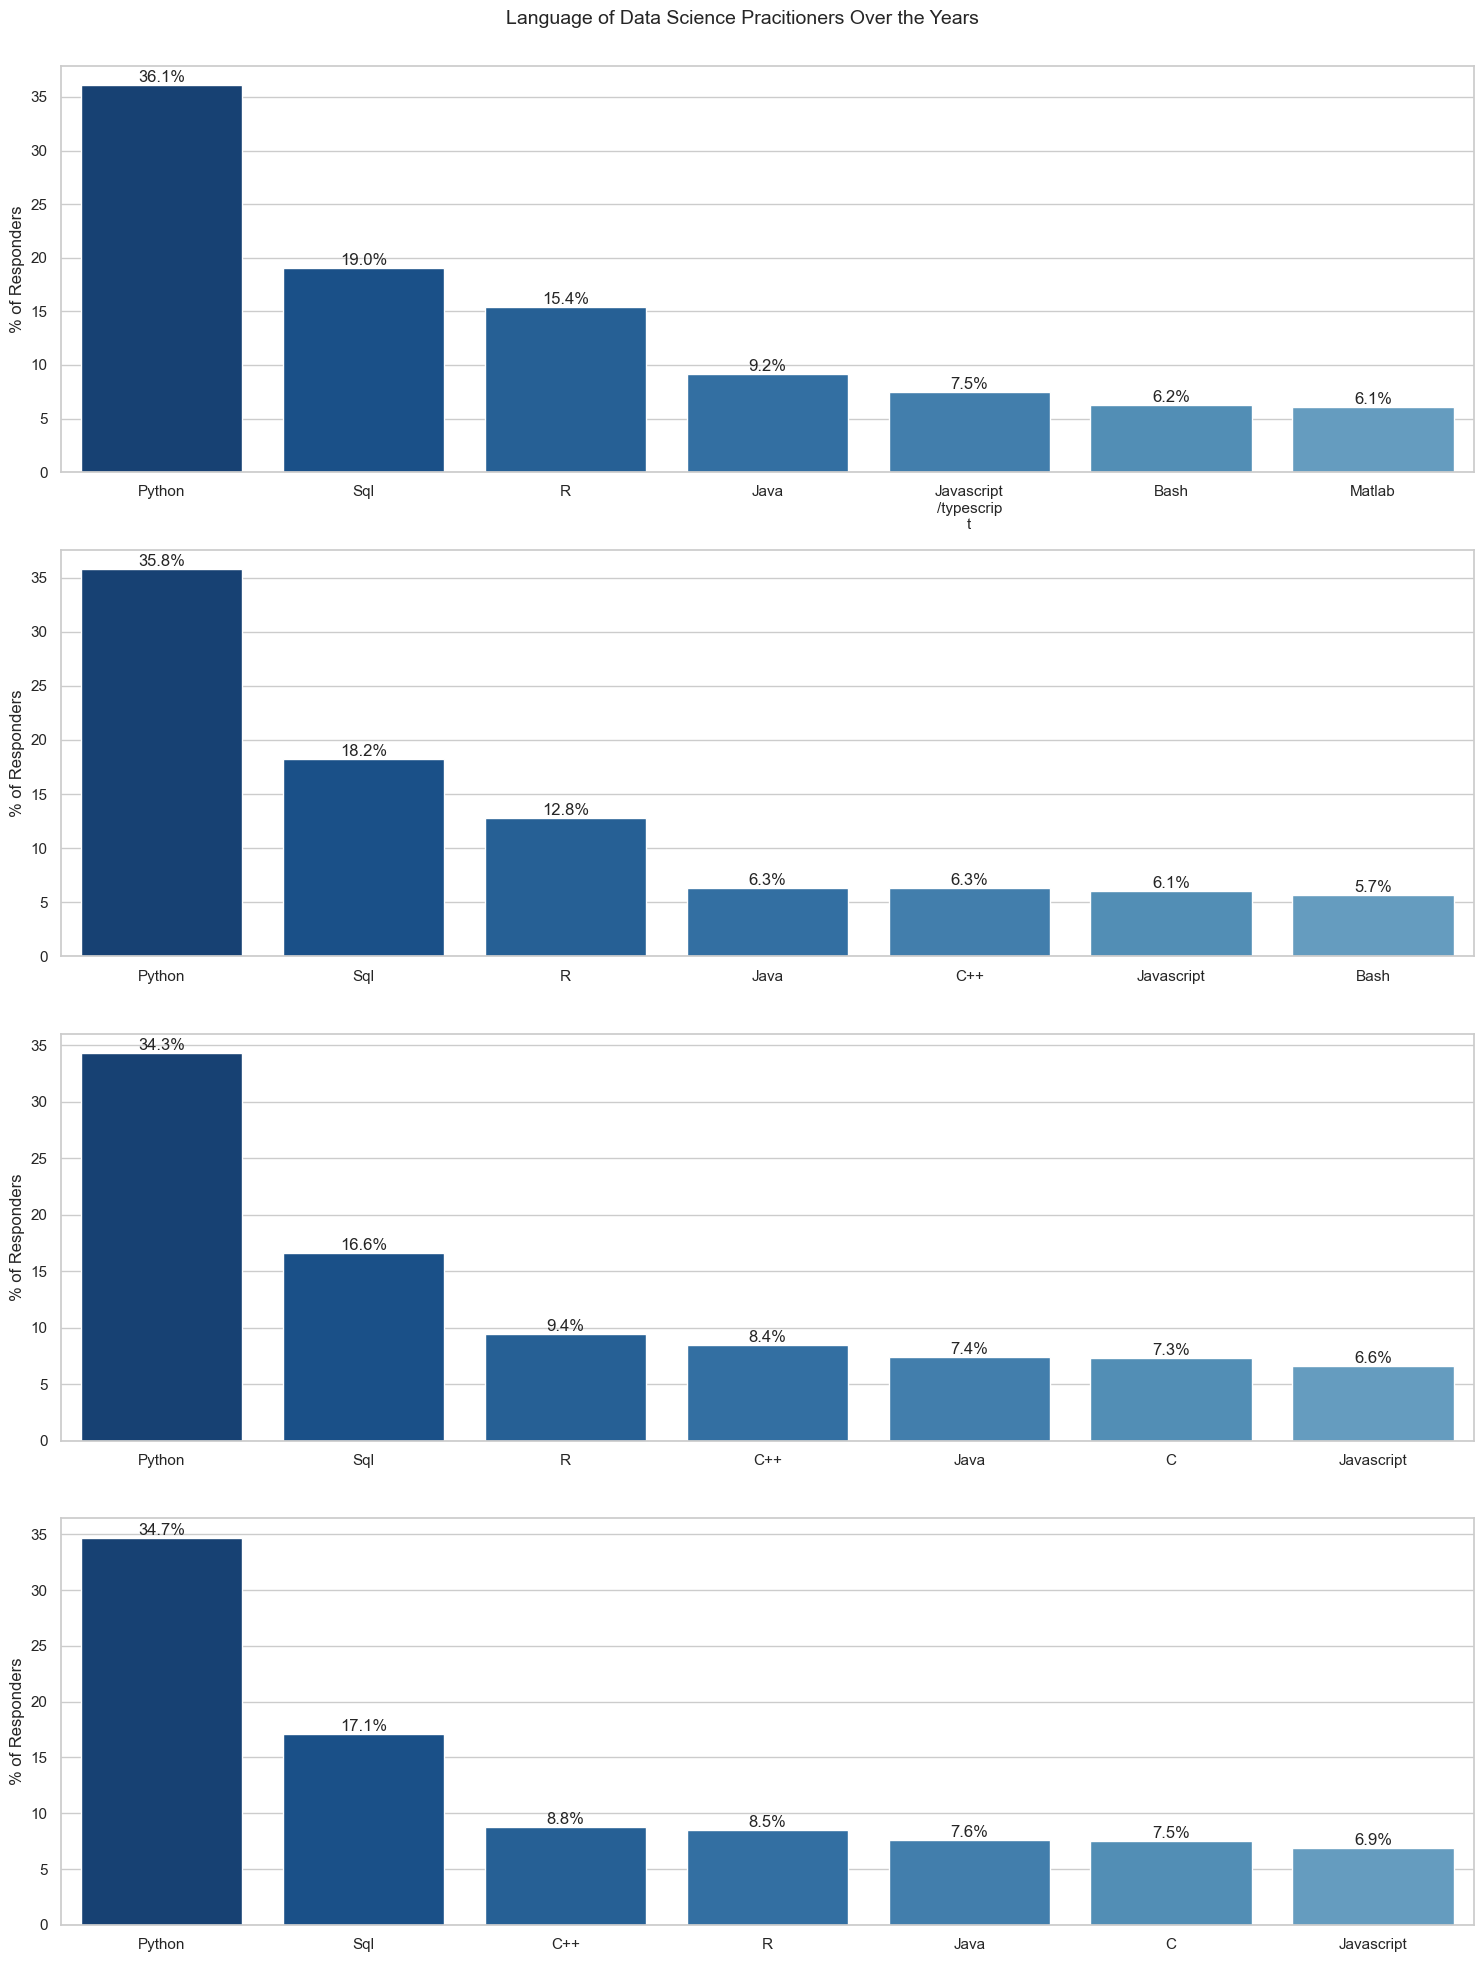

In [417]:
FEATURE = 'Language'
QNS = ['7']

def clean_language_answers(ans):
    new_ans = ans.capitalize()
    return new_ans

survey_language_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS,
                                                    clean_fn=clean_language_answers)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':7,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_language_percent, plot_vars)

## Algorithms/Concepts ##

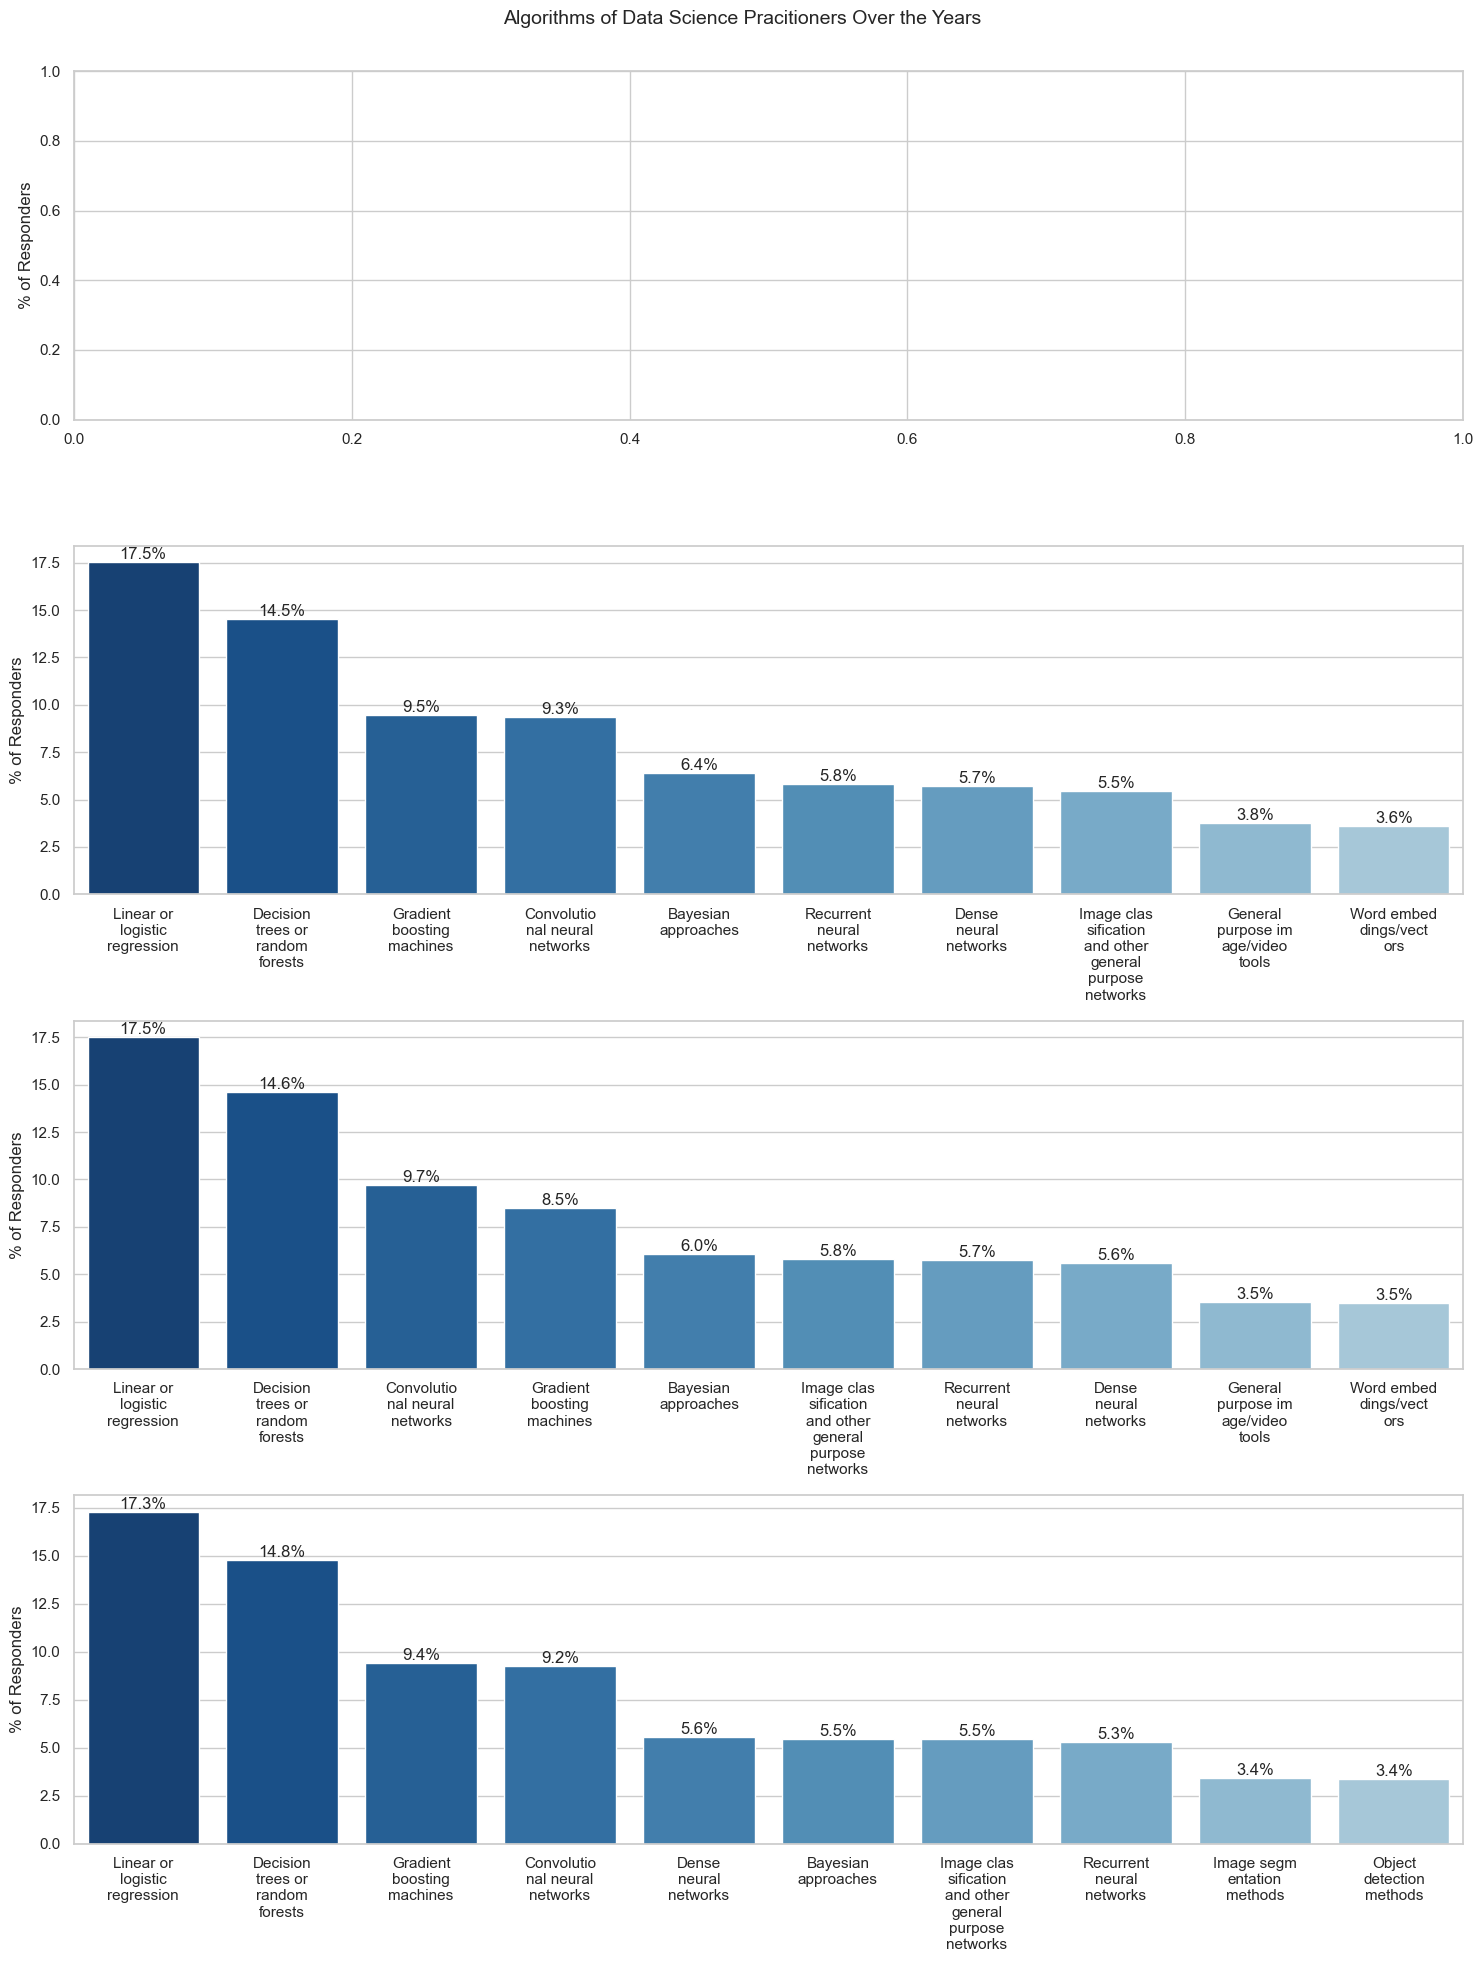

In [418]:
FEATURE = 'Algorithms'
QNS = ['17', '18', '19']

def clean_algorithms_answers(ans):
    new_ans = re.sub("\(.*\)","", ans).capitalize()
    return new_ans

survey_algorithms_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS,
                                                      clean_fn=clean_algorithms_answers,
                                                      with_qnno=False)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_algorithms_percent, plot_vars)

## Machine Learning Tools ##

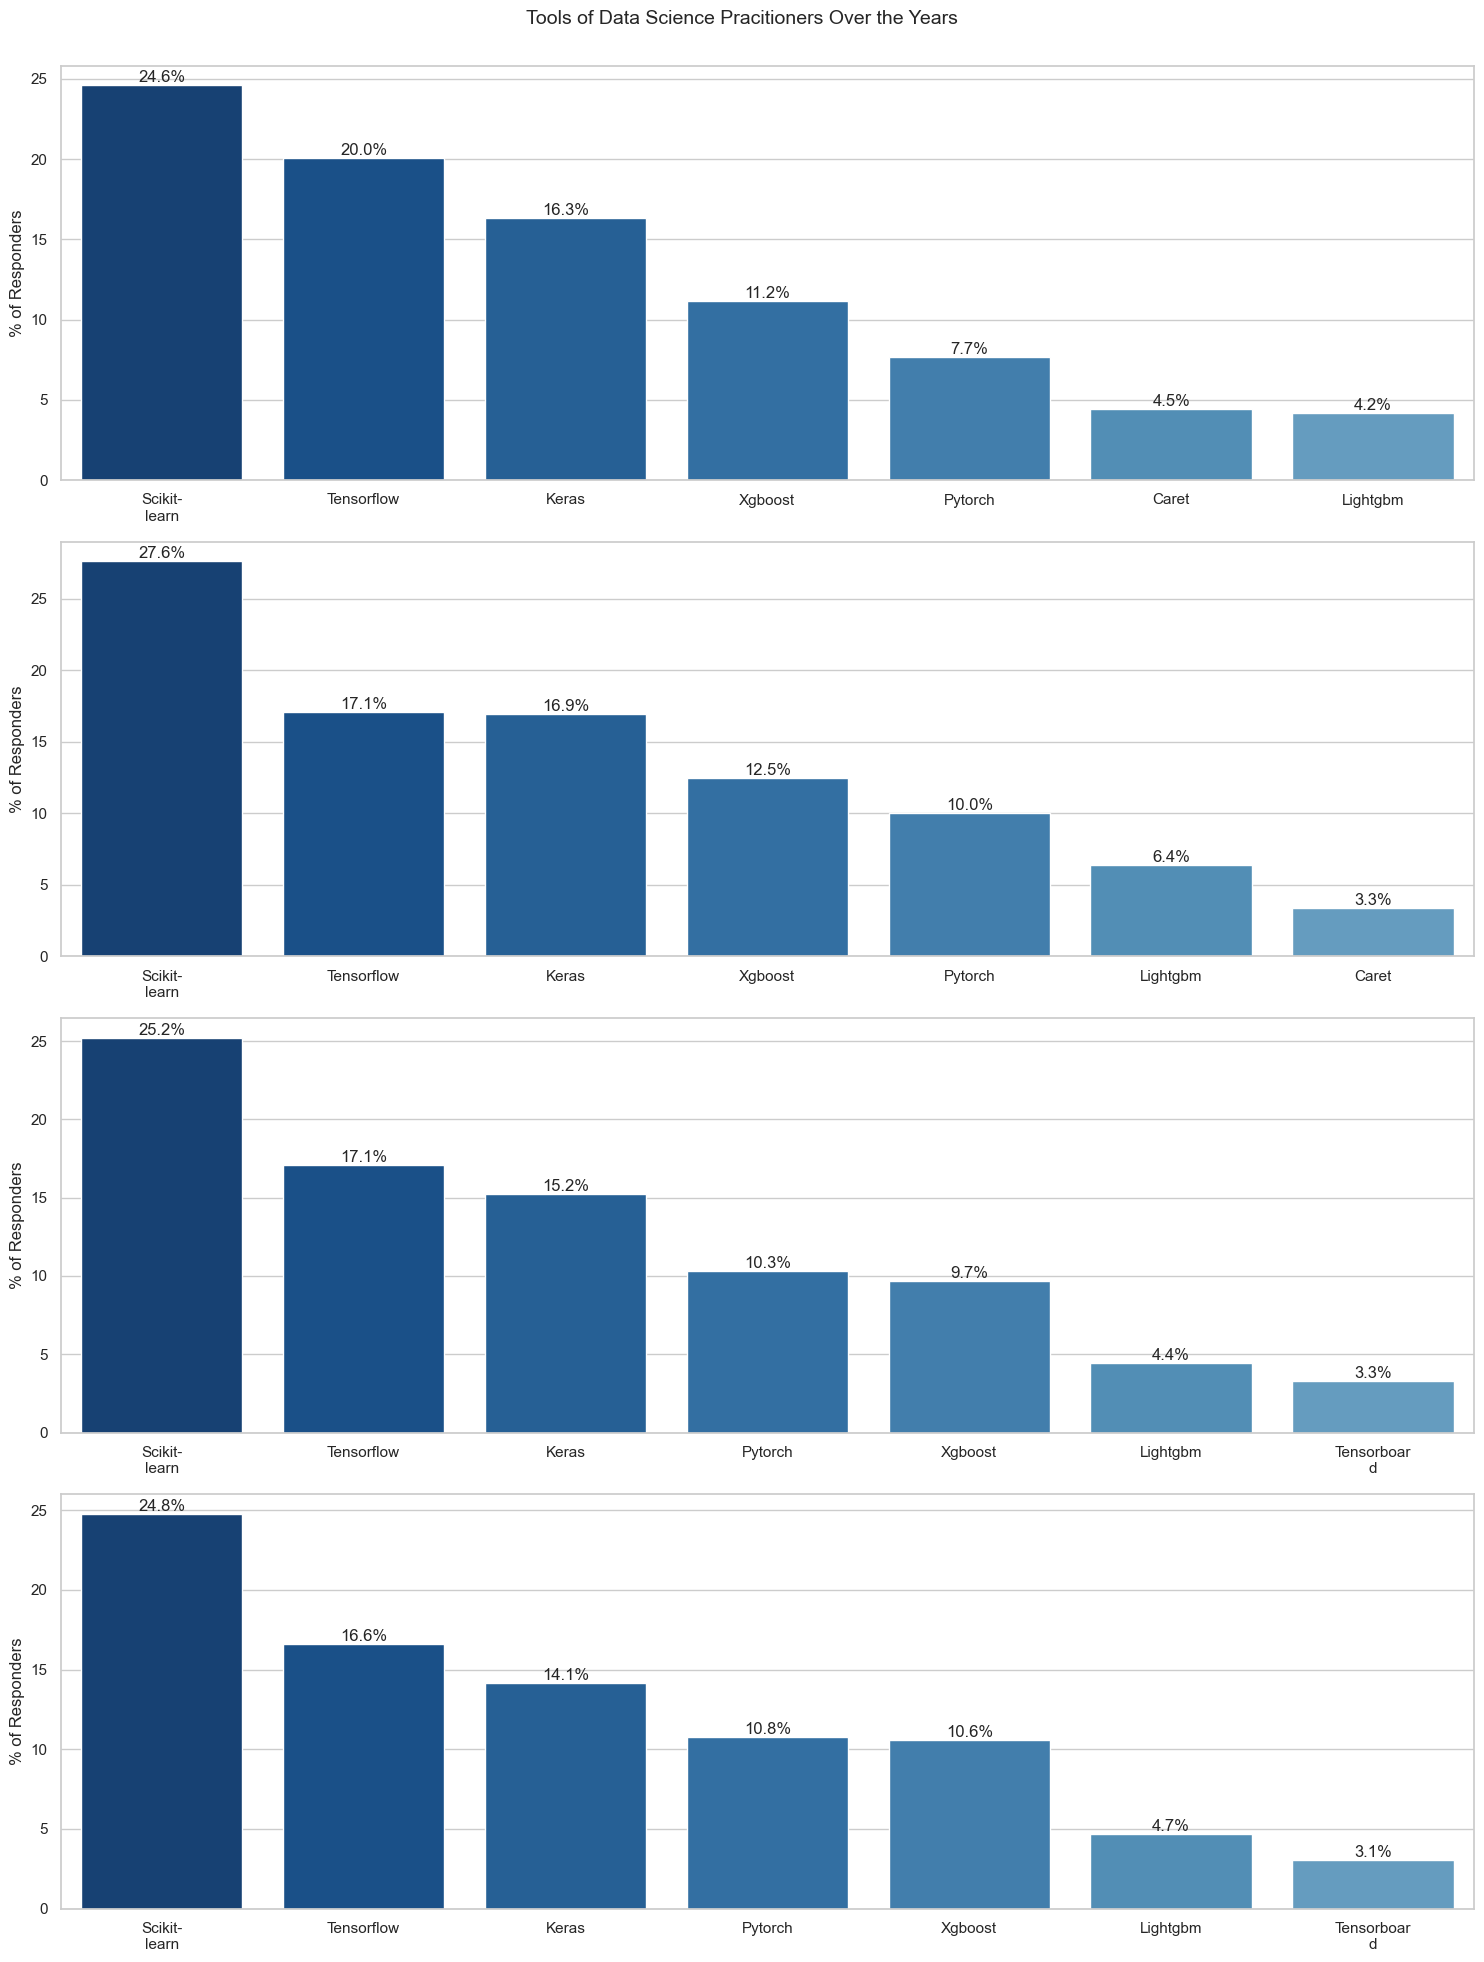

In [406]:
FEATURE = 'Tools'
QNS = ['16', '34', '35']

def clean_tools_answers(ans):
    new_ans = re.sub("\(.*\)","", ans).capitalize()
    return new_ans


survey_tools_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS,  
                                                 clean_fn=clean_tools_answers, 
                                                 with_qnno=False)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':7,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_tools_percent, plot_vars)

## Cloud/Big Data/BI Tools ##

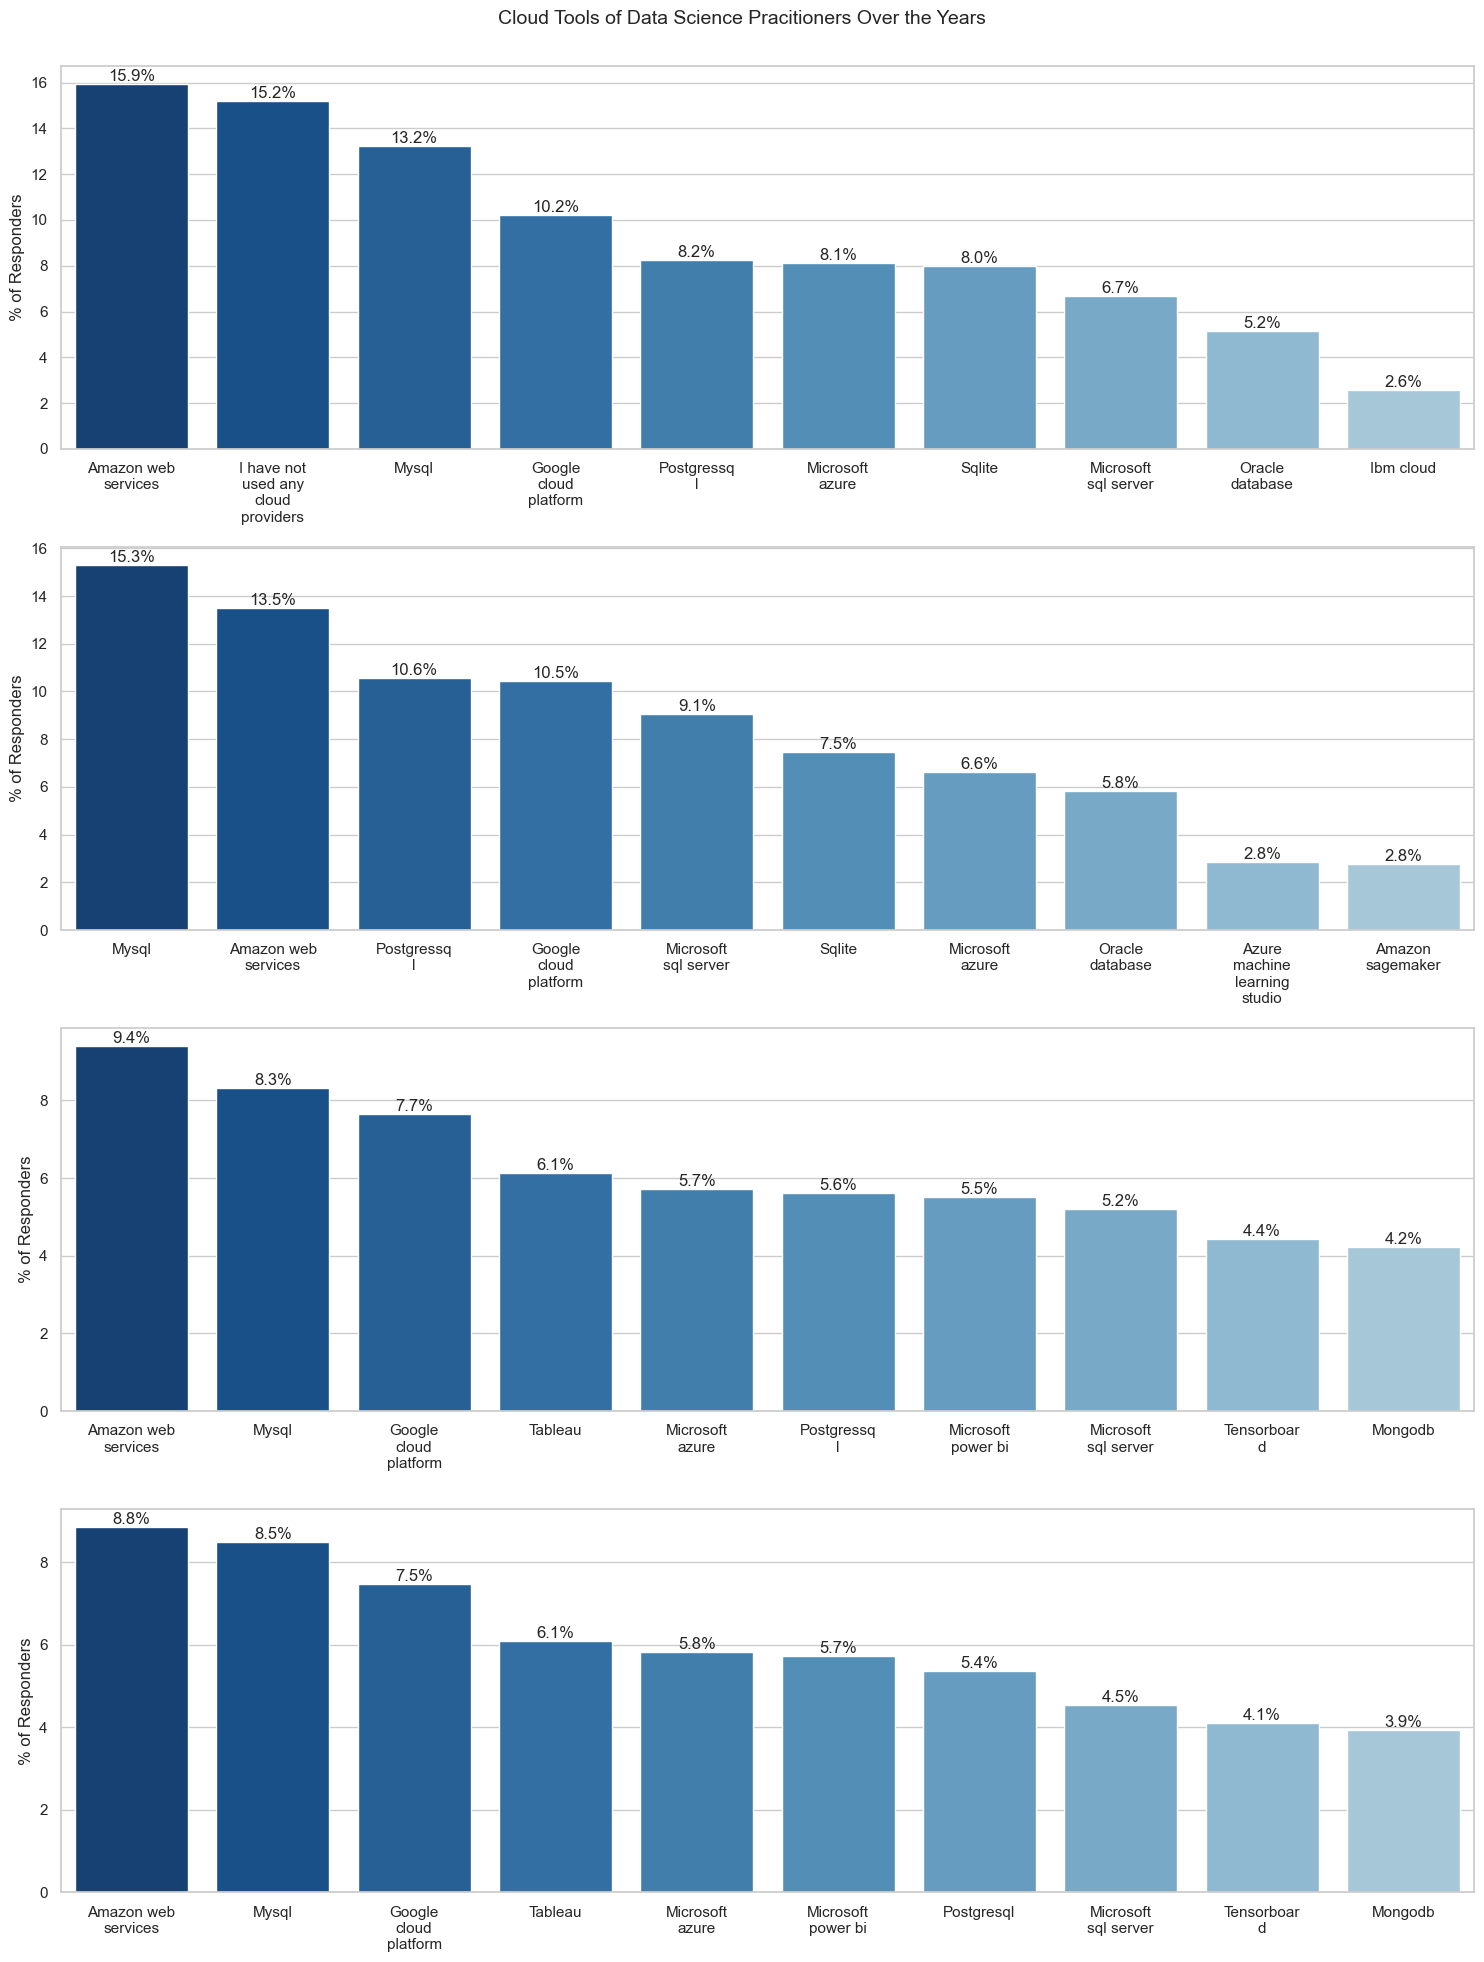

In [407]:
FEATURE = 'Cloud Tools'
QNS = ['27','28', '29', '31', '34', '35']

def clean_tools_answers(ans):
    new_ans = re.sub("\(.*\)","", ans).capitalize()
    return new_ans

survey_industry_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS,
                                                    clean_fn=clean_tools_answers)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_industry_percent, plot_vars)

## Data Analysis/Visualisation Tools ##

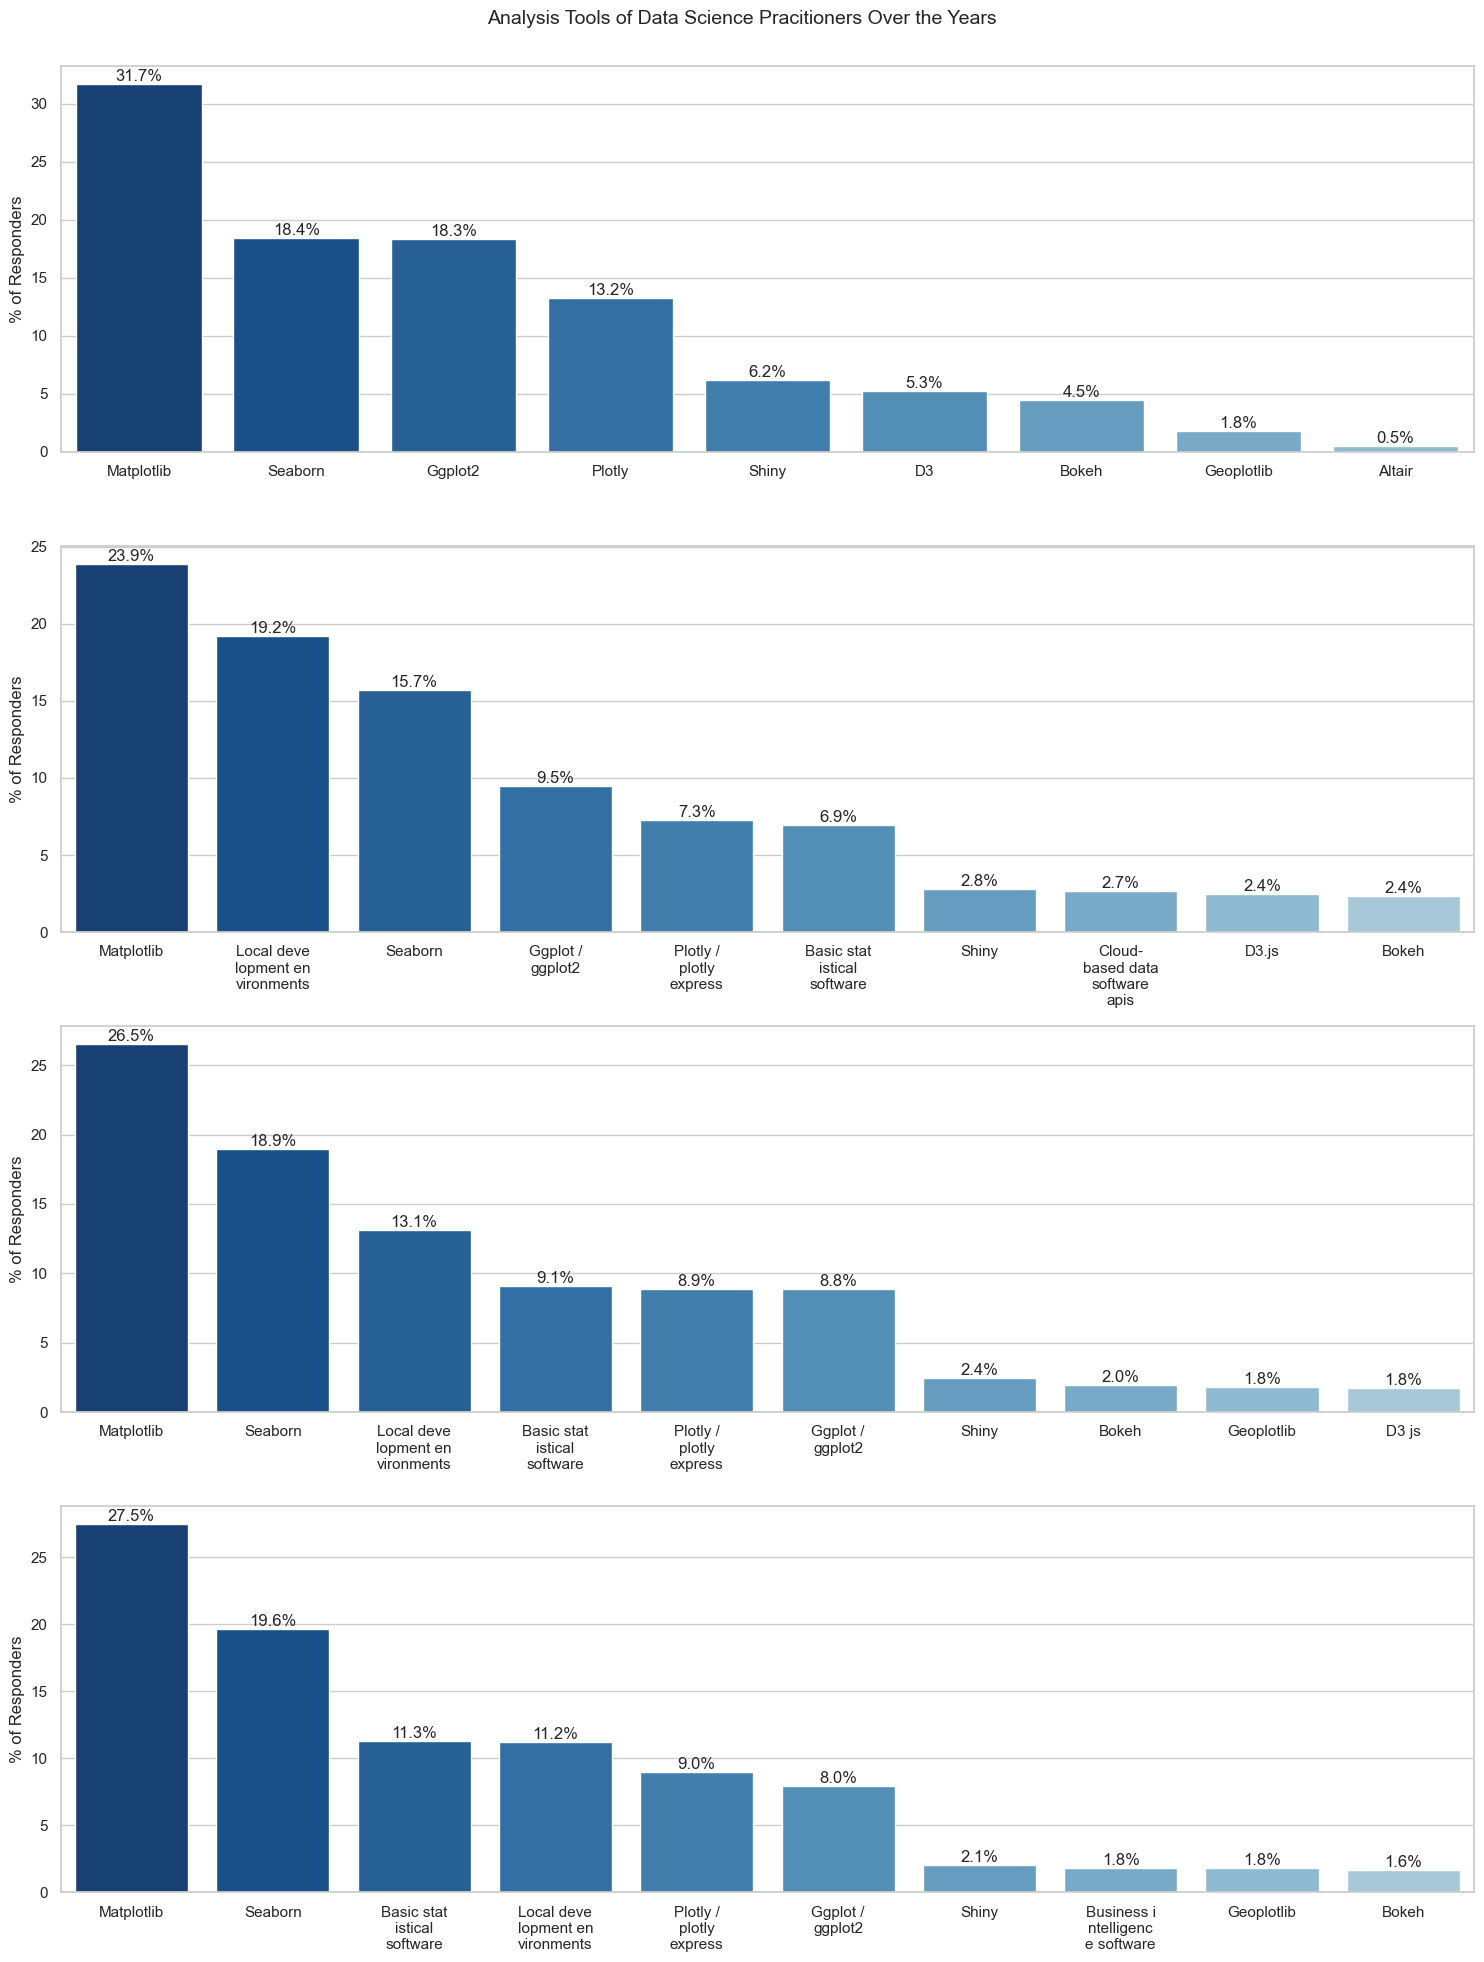

In [412]:
FEATURE = 'Analysis Tools'
QNS = ['14', '38']

def clean_tools_answers(ans):
    new_ans = re.sub("\(.*\)","", ans).capitalize()
    return new_ans

survey_industry_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS,
                                                    clean_fn=clean_tools_answers)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_industry_percent, plot_vars)

## Future ##

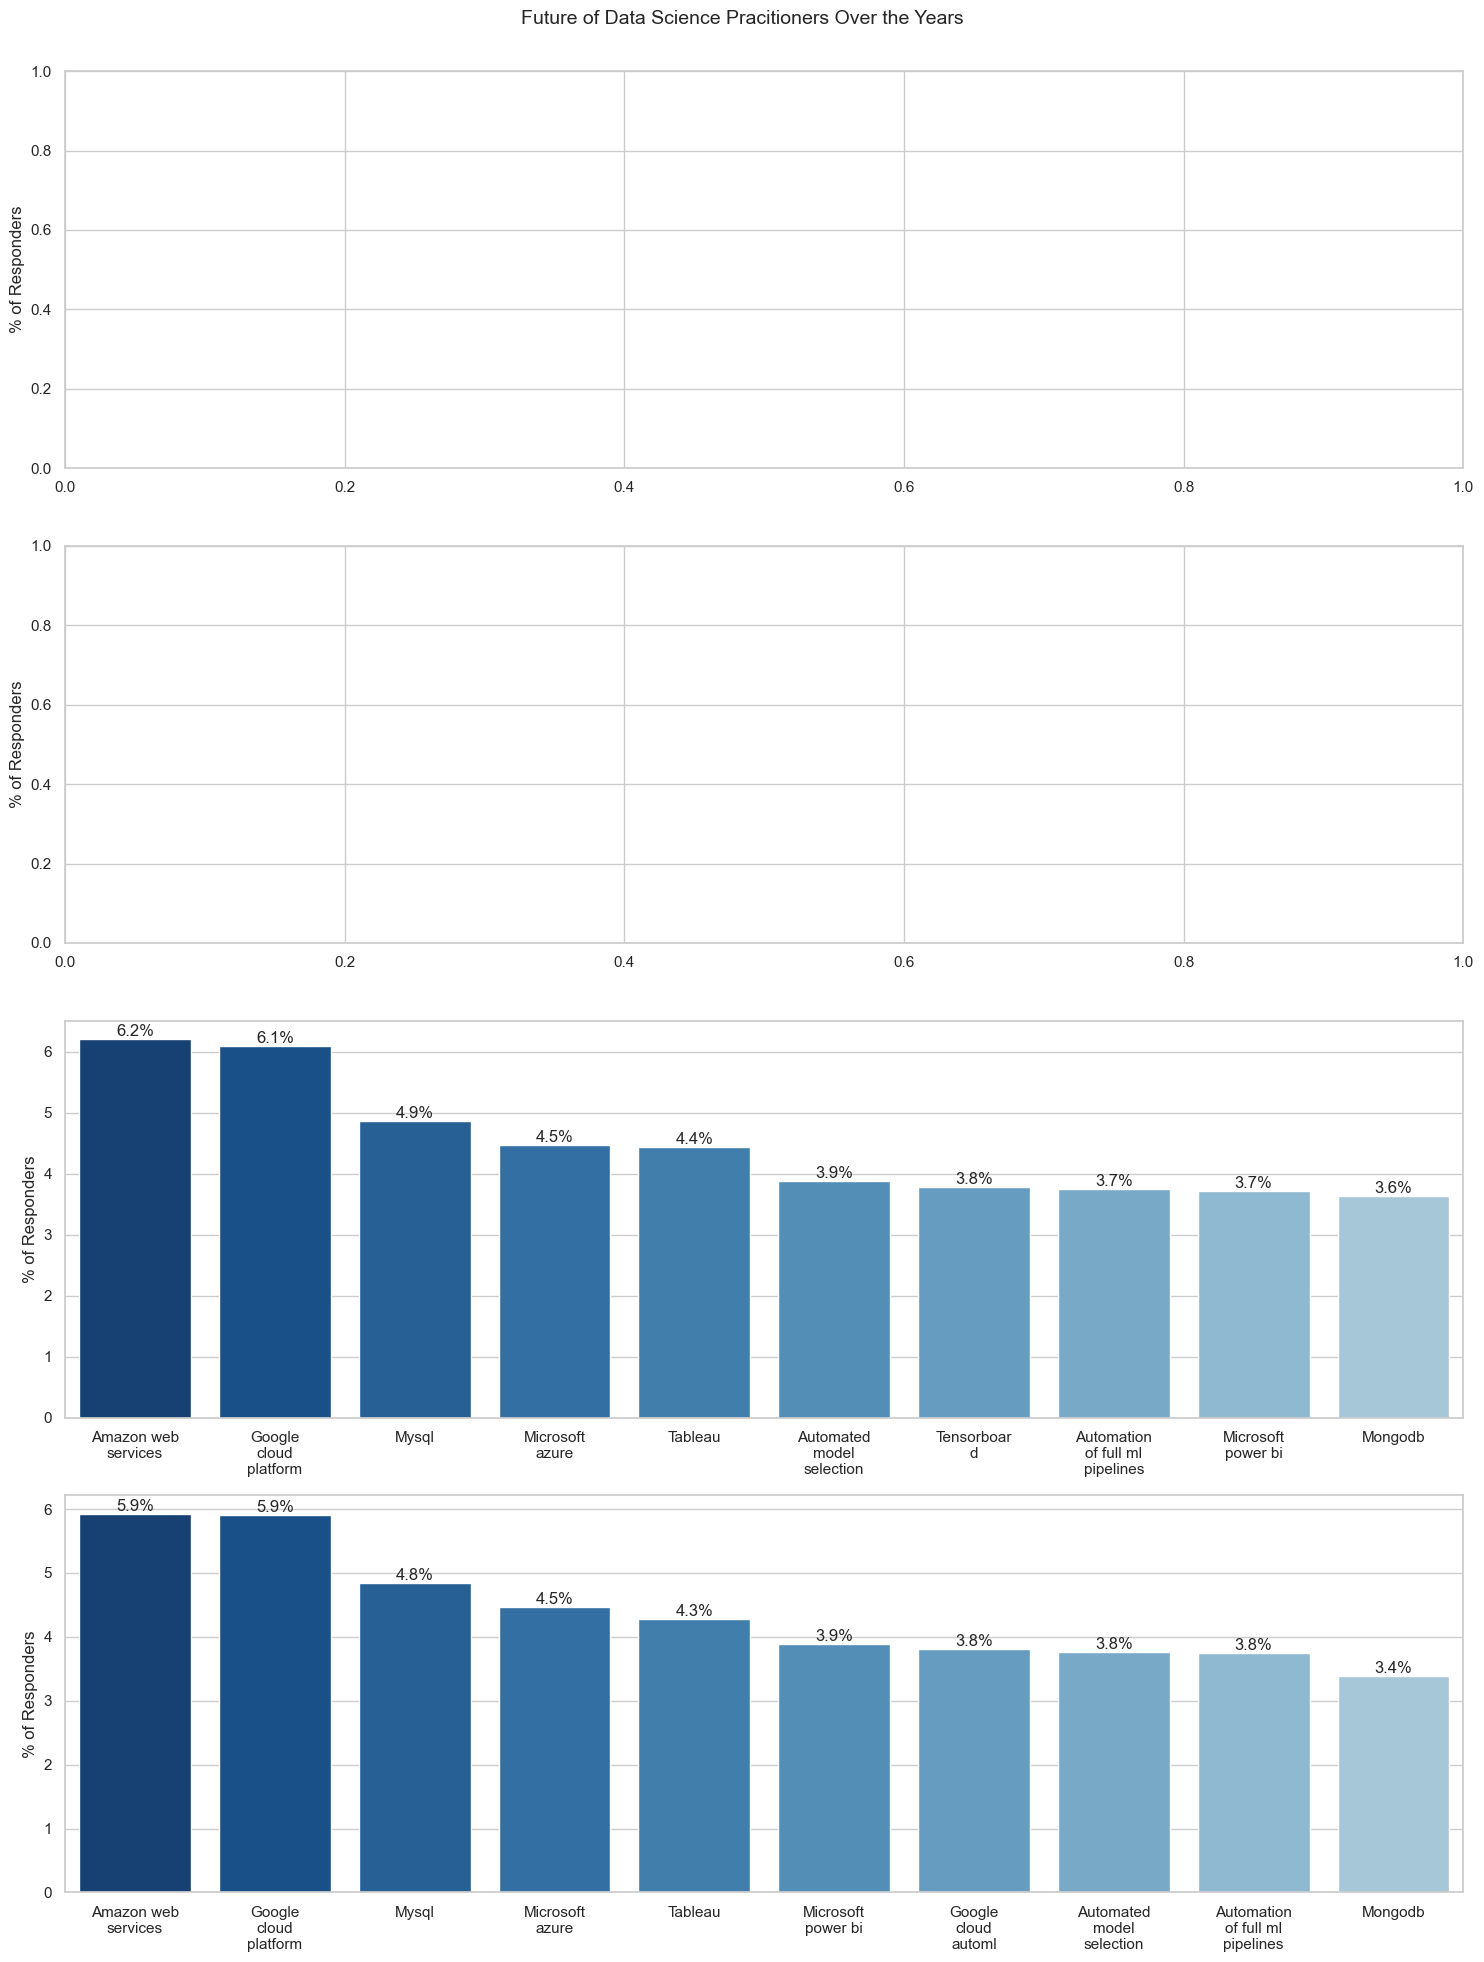

In [413]:
FEATURE = 'Future'
QNS = ['40', '41', '42', '43', '44', '45']

def clean_future_answers(ans):
    new_ans = re.sub("\(.*\)","", ans).capitalize()
    return new_ans

survey_future_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS, 
                                                  clean_fn=clean_future_answers)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_future_percent, plot_vars)

## Age ##

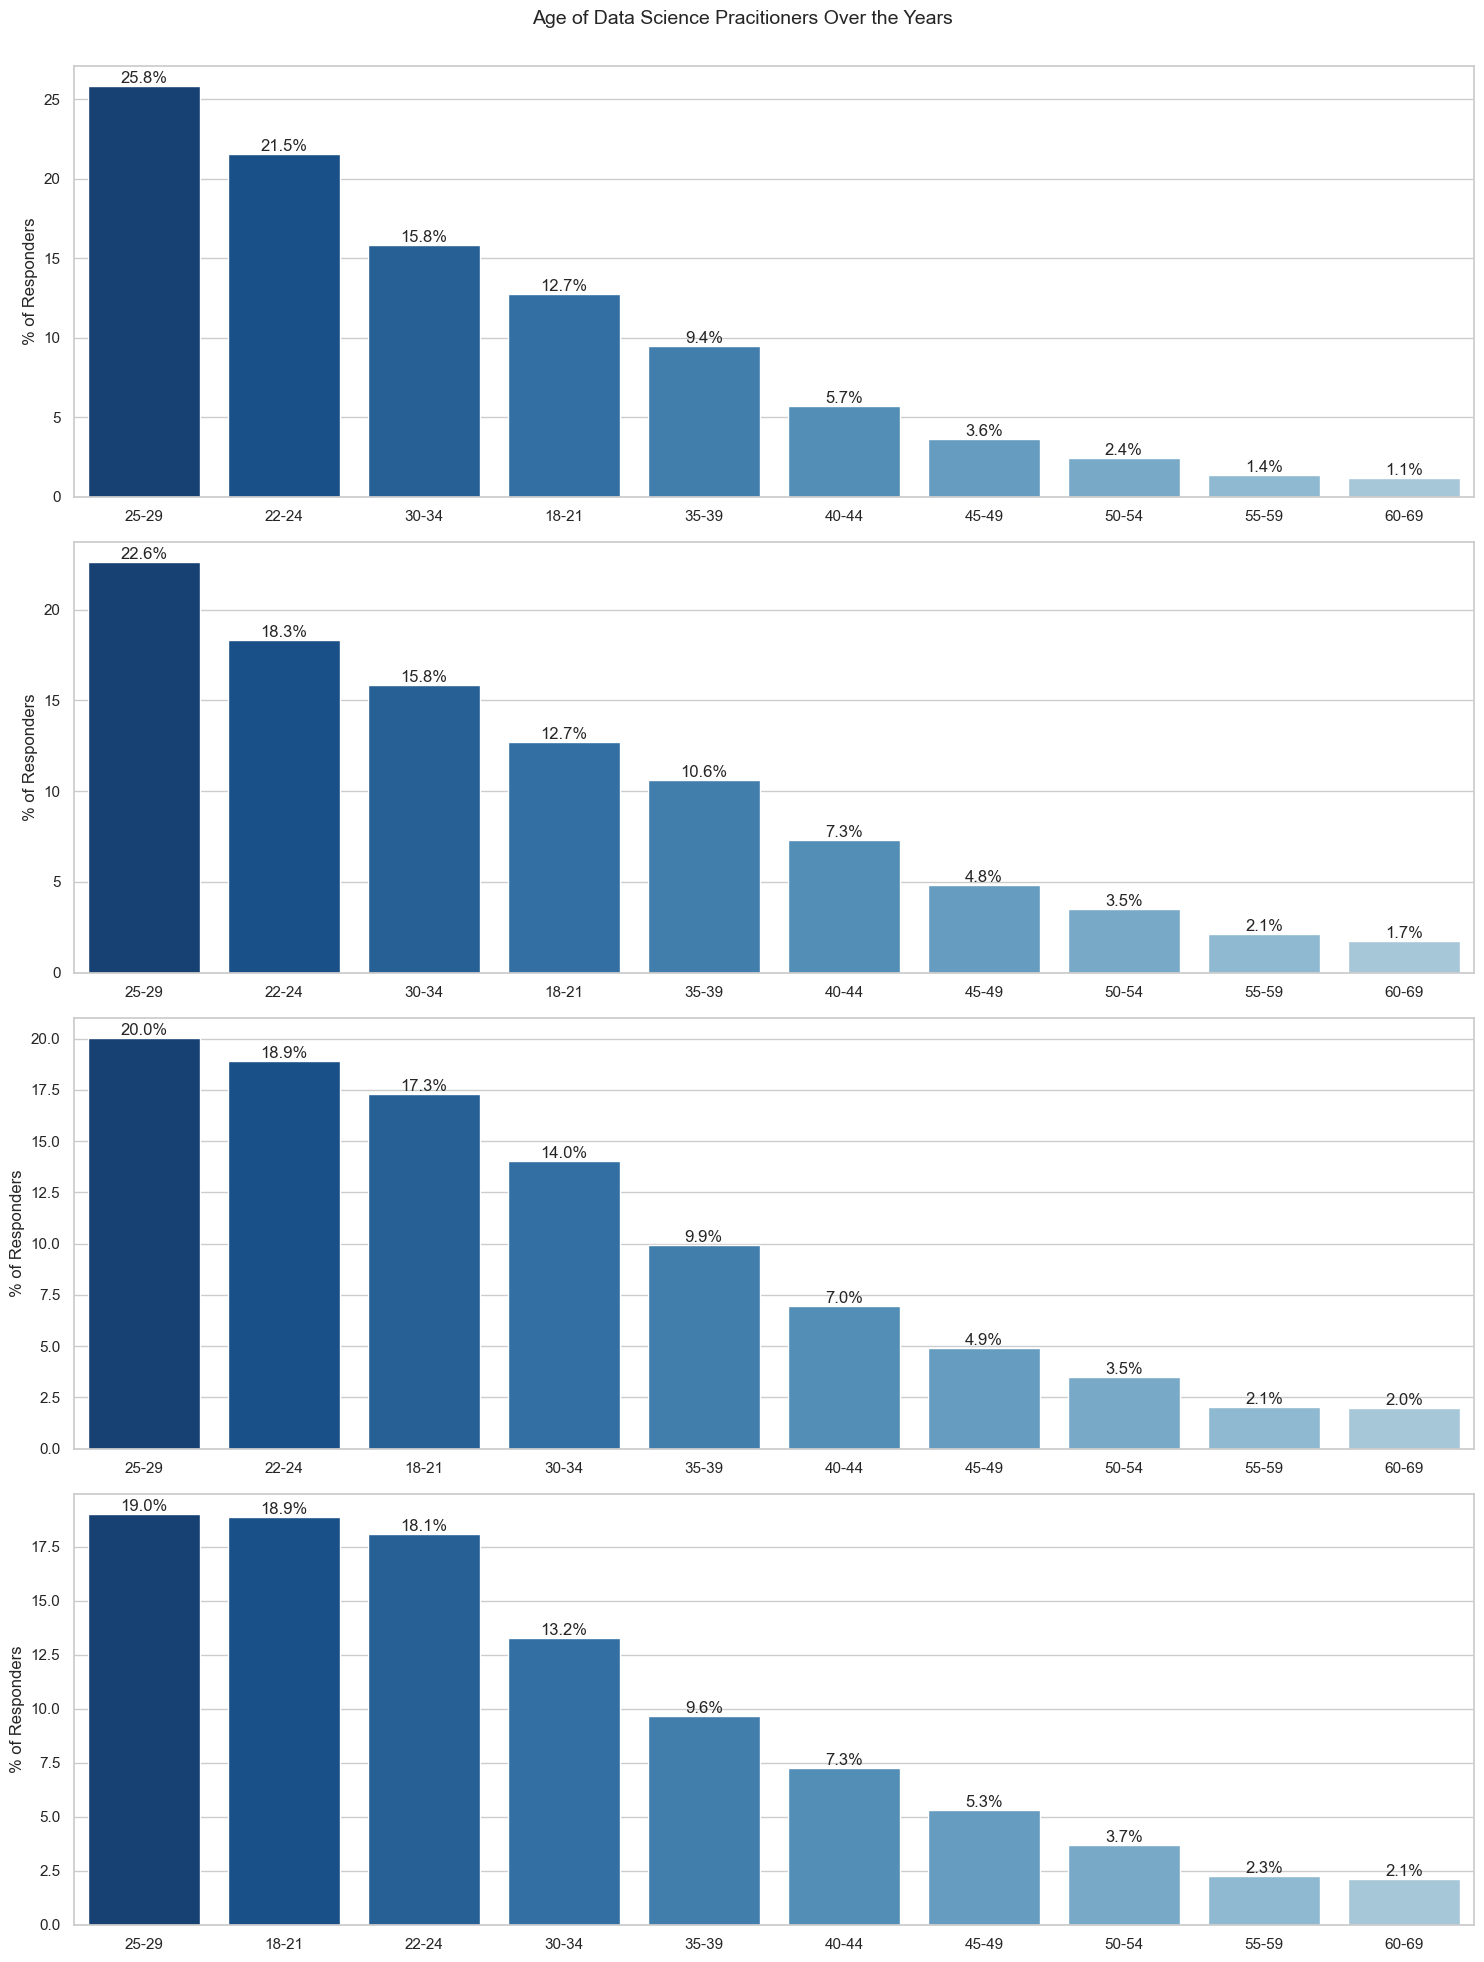

In [419]:
FEATURE = 'Age'
QNS = ['1']

# def clean_future_answers(ans):
#     new_ans = re.sub("\(.*\)","", ans).capitalize()
#     return new_ans

survey_age_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_age_percent, plot_vars)

## Countries ##

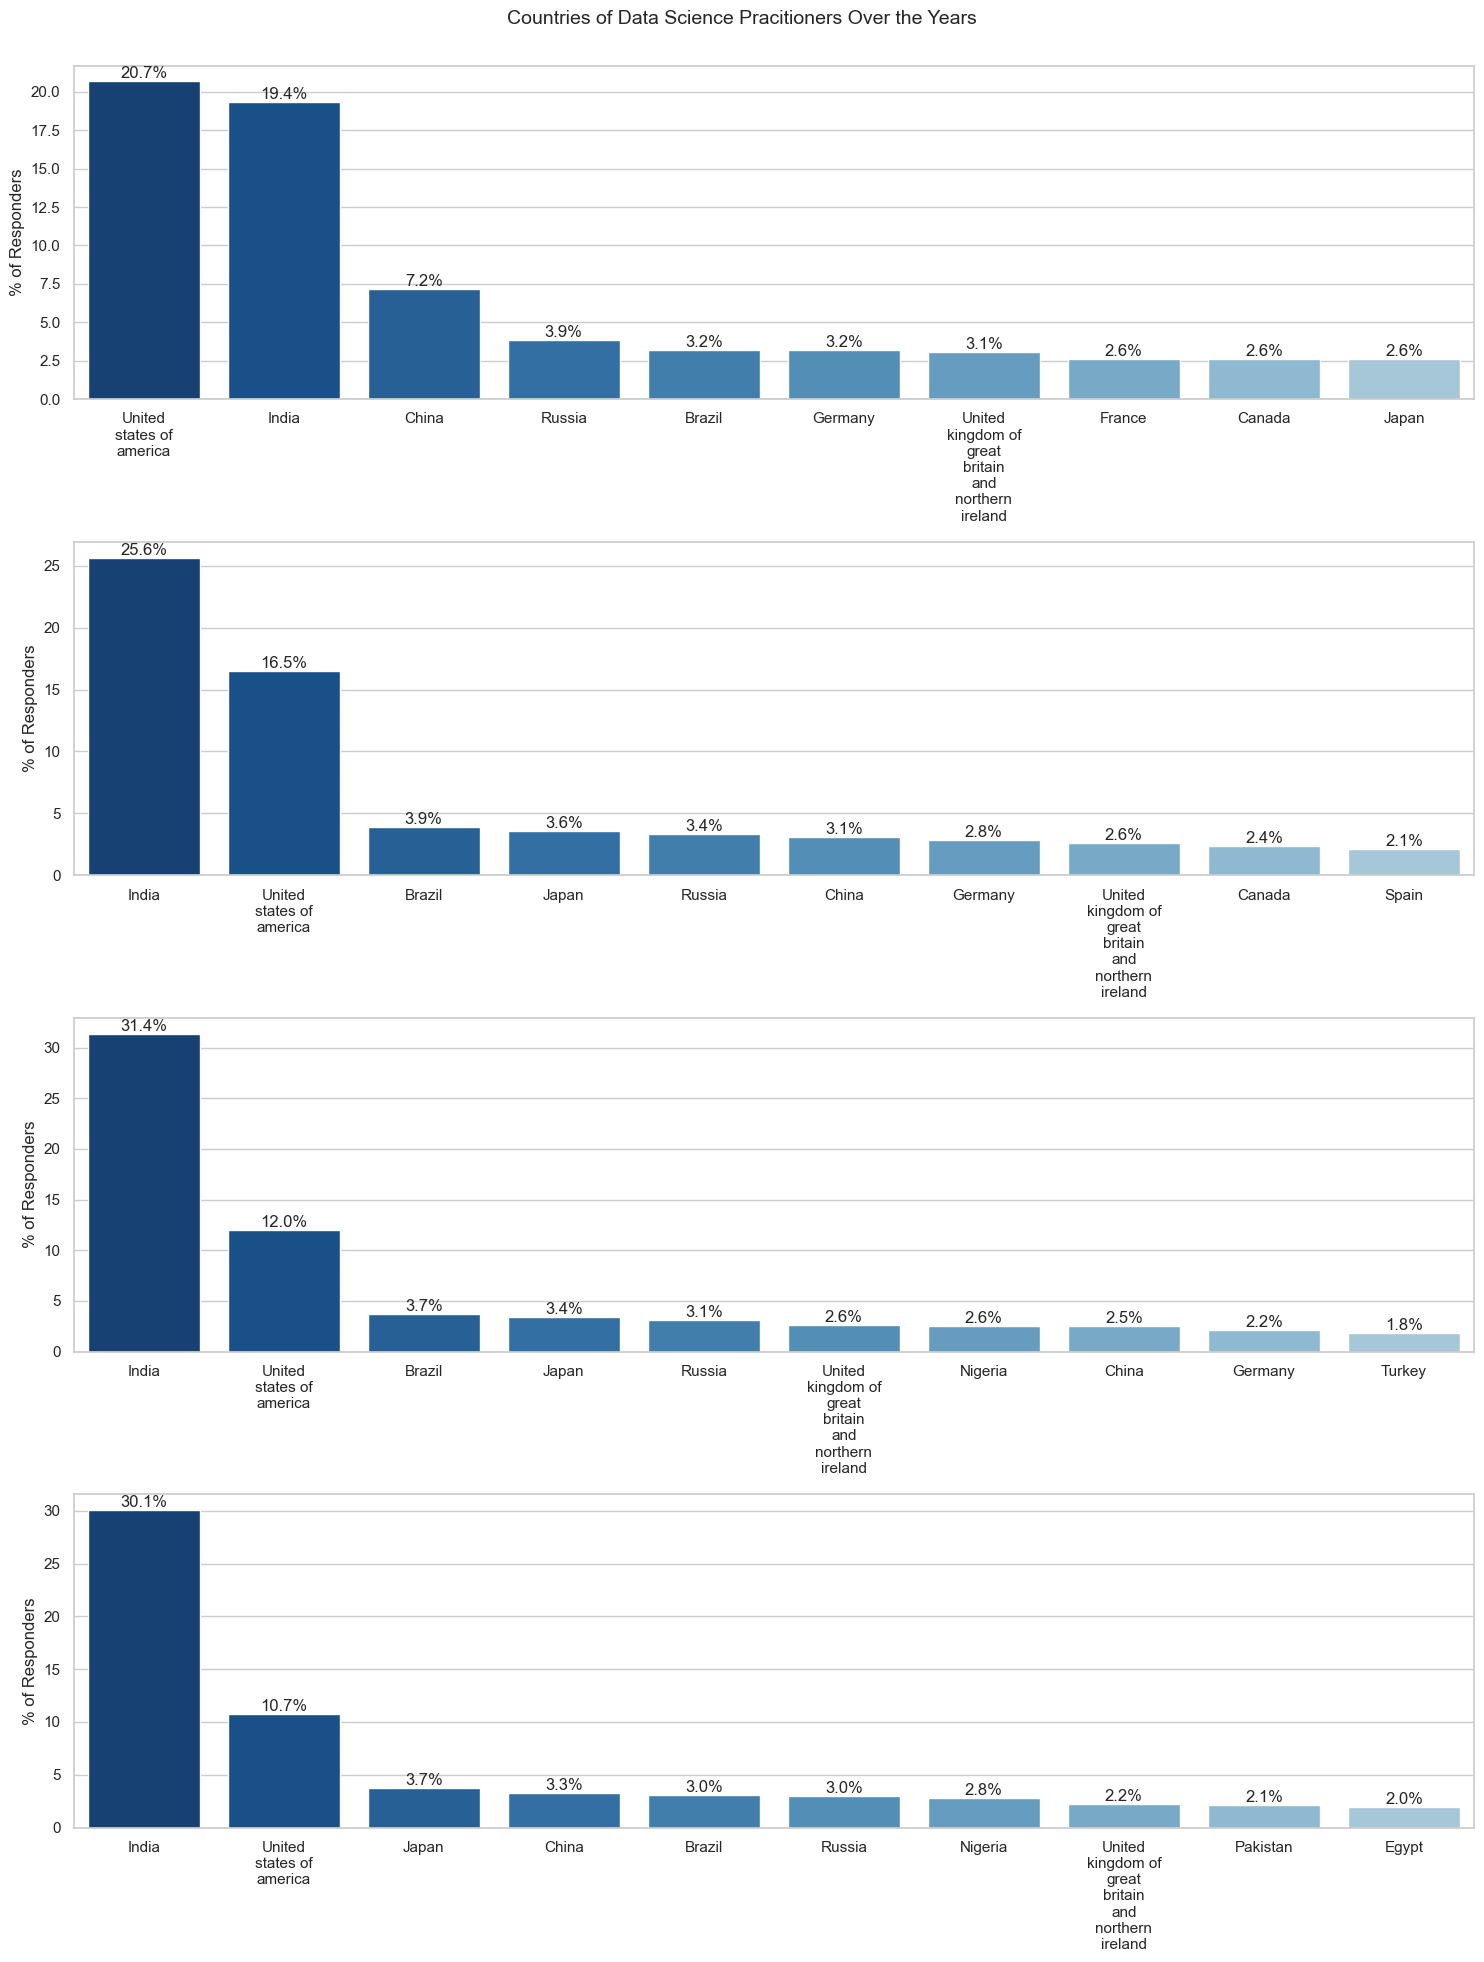

In [421]:
FEATURE = 'Countries'
QNS = ['3']

def clean_countries_answers(ans):
    new_ans = ans.capitalize()
    return new_ans

survey_countries_percent = feature_percent_over_time(ds_survey_clean, FEATURE, QNS, 
                                                  clean_fn=clean_countries_answers)

plot_vars = {'metric':'Percent', 
            'ylabel':r'% of Responders',
            'title':f'{FEATURE} of Data Science Pracitioners Over the Years\n\n',
            'top_n':10,
            'feature':FEATURE,
            'figsize':(15,20)}
plot_top_classes_over_years(survey_countries_percent, plot_vars)